In [57]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [58]:
def parseMatrixFromFile(fname):
    with open(fname) as f:
        for l in f:
            #print(l)
            yield [float(x) for x in l.strip().split()]

In [59]:
rhythm_data_ = list(parseMatrixFromFile("mus_dataset_2.txt"))
rhythm_data_ = rhythm_data_[0]

In [72]:
len(rhythm_data_)

221

In [84]:
memory = 50

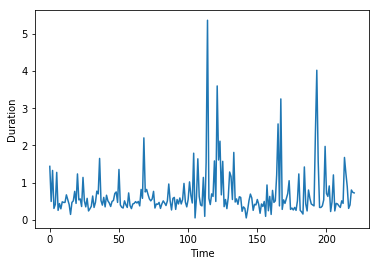

In [85]:
x = [i for (i,x) in enumerate(rhythm_data_)]

plt.plot(x,rhythm_data_)
plt.xlabel("Time")
plt.ylabel("Duration")
plt.show()

In [86]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return dataX, dataY

In [87]:
X_train, y_train = create_dataset(rhythm_data_, look_back=memory)

In [88]:
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
train_size = len(rhythm_data_)

In [90]:
generated_rhythm = []
num_samples = train_size

# fix random seed for reproducibility
#np.random.seed(7)
#start = np.random.randint(0, train_size-1)
start = 0
pattern_raw = X_train[0]
pattern = pattern_raw
print("Seed:",start)
print(pattern)

# generate sequence with a random seed
for i in range(num_samples):
    x = pattern
    
    prediction = clf.predict([x])
    print("------>",prediction[0])
    generated_rhythm.append(prediction[0])
    pattern.append(prediction[0])
    pattern = pattern[1:len(pattern)]
print("Generation Completed!")

Seed: 0
[1.4375, 0.4947916666666667, 1.328125, 0.3072916666666667, 0.4166666666666667, 1.2760416666666667, 0.2552083333333333, 0.4375, 0.296875, 0.484375, 0.46875, 0.46875, 0.671875, 0.546875, 0.4114583333333333, 0.14583333333333334, 0.46875, 0.5104166666666666, 0.765625, 0.4427083333333333, 1.234375, 0.5364583333333334, 0.5625, 0.359375, 1.140625, 0.5104166666666666, 0.3489583333333333, 0.578125, 0.23958333333333334, 0.296875, 0.3645833333333333, 0.640625, 0.3333333333333333, 0.46875, 0.7708333333333334, 0.6979166666666666, 1.6510416666666667, 0.5208333333333334, 0.3958333333333333, 0.6041666666666666, 0.3489583333333333, 0.6614583333333334, 0.5104166666666666, 0.453125, 0.359375, 0.4947916666666667, 0.5208333333333334, 0.7083333333333334, 0.75, 0.46875]
------> 0.659485172002
------> 0.6618235249
------> 0.728194666501
------> 0.779934470634
------> 0.534894772077
------> 0.745024349055
------> 0.817636224407
------> 0.634305546418
------> 0.704066311906
------> 0.556969289641
------

In [91]:
def write_to_file(filename, arg_list):
    file = open(filename, 'w')
    for item in arg_list:
        file.write(str(item)+" ")
    file.close()
    print("Output dumped to file ",filename)

In [92]:
write_to_file("mus_dataset_2_output.txt",generated_rhythm)

Output dumped to file  mus_dataset_2_output.txt


In [93]:
final_result = generated_rhythm

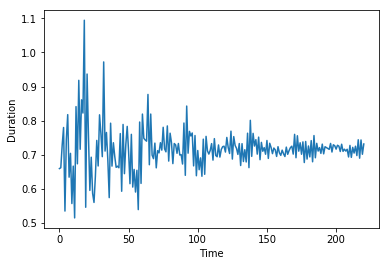

In [94]:
x = [i for (i,x) in enumerate(final_result)]
plt.plot(x,final_result)
plt.xlabel("Time")
plt.ylabel("Duration")
plt.show()